In [1]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\ANACONDA PIton\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "D:\ANACONDA PIton\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "D:\ANACONDA PIton\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "D:\ANACONDA PIton\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "D:\ANACONDA PIton\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\ANACONDA PIton\l

TypeError: can only concatenate str (not "list") to str

In [44]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

In [46]:
path_to_zip = 'D:/DOWNLOADS/wetransfer-48f632/tensorflow.zip'
PATH = os.path.join(os.path.dirname(path_to_zip), '')

In [47]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [48]:
train_masa = os.path.join(train_dir, '01')  # directory with our training cat pictures
train_usa = os.path.join(train_dir, '02')  # directory with our training dog pictures
validation_masa = os.path.join(validation_dir, '01')  # directory with our validation cat pictures
validation_usa = os.path.join(validation_dir, '02')  # directory with our validation dog pictures

In [49]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [50]:
train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [51]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 326 images belonging to 2 classes.


In [52]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 326 images belonging to 2 classes.


In [53]:
sample_training_images, _ = next(train_data_gen)

In [54]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

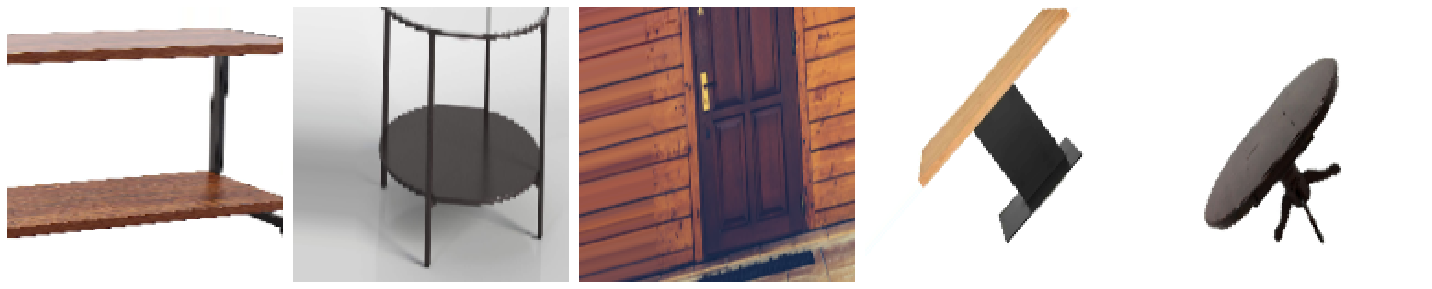

In [55]:
plotImages(sample_training_images[:5])

In [56]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

In [59]:
num_cats_tr = len(os.listdir(train_masa))
num_dogs_tr = len(os.listdir(train_usa))

num_cats_val = len(os.listdir(validation_masa))
num_dogs_val = len(os.listdir(validation_usa))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [60]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2 steps, validate for 2 steps
Epoch 1/15


D:\ANACONDA PIton\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2/2 [==============================] - 35s 17s/step - loss: 2.4044 - accuracy: 0.7305 - val_loss: 1.8684 - val_accuracy: 0.7422
Epoch 2/15
2/2 [==============================] - 30s 15s/step - loss: 2.4556 - accuracy: 0.4192 - val_loss: 0.4998 - val_accuracy: 0.7422
Epoch 3/15
2/2 [==============================] - 34s 17s/step - loss: 0.7064 - accuracy: 0.7305 - val_loss: 0.7216 - val_accuracy: 0.7422
Epoch 4/15
2/2 [==============================] - 31s 16s/step - loss: 0.5709 - accuracy: 0.7778 - val_loss: 0.5958 - val_accuracy: 0.7422
Epoch 5/15
2/2 [==============================] - 30s 15s/step - loss: 0.6083 - accuracy: 0.7778 - val_loss: 0.5120 - val_accuracy: 0.7422
Epoch 6/15
2/2 [==============================] - 35s 17s/step - loss: 0.5735 - accuracy: 0.7305 - val_loss: 0.5171 - val_accuracy: 0.7422
Epoch 7/15
2/2 [==============================] - 32s 16s/step - loss: 0.5474 - accuracy: 0.7121 - val_loss: 0.4719 - val_accuracy: 0.7422
Epoch 8/15
2/2 [======================

In [61]:
model.save("test.pb")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: test.pb\assets
